### Obejective:
1. Iterative Imputation
2. Horse Colic Dataset
3. Iterative Imputation With IterativeImputer

### Iterative Imputation

Iterative imputation refers to a process
where each feature is modeled as a function of the other features, e.g. a regression problem
where missing values are predicted. Each feature is imputed sequentially, one after the other,
allowing prior imputed values to be used as part of a model in predicting subsequent features. It is an iterative process.

This
approach may be generally referred to as fully conditional specification (FCS) or multivariate
imputation by chained equations (MICE)

In [1]:
#libraries
import numpy as np
import pandas as pd


In [2]:
# load the dataset
df = pd.read_csv("horse-colic.csv", header=None, na_values="?")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [3]:
#missing value
for i in range(df.shape[1]):
# count number of rows with missing values
    miss = df[[i]].isnull().sum()
    perc = miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


### Iterative Imputer

By default, a BayesianRidge model is employed that uses a function of all other input
features. Features are filled in ascending order, from those with the fewest missing values to
those with the most

In [8]:
#lib
from sklearn.experimental import enable_iterative_imputer  #its still in experimental stage
from sklearn.impute import IterativeImputer
#load dataset
df = pd.read_csv("horse-colic.csv", header=None, na_values="?")
#split the data
data = df.values
ix = [i for i in range(df.shape[1]) if i!=23] #23 target
X,y = data[:,ix], data[:,23]
#summarize missing value
print("Missing: %d" % sum(np.isnan(X).flatten()))

#imputer_default = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None,imputation_order='ascending')
imputer = IterativeImputer()
imputer.fit(X)
Xtrans = imputer.transform(X)
#summarize missing value
print("Missing: %d" % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


### IterativeImputer and Different Number of Iterations

>1 0.869 (0.045)
>2 0.868 (0.049)
>3 0.871 (0.055)
>4 0.867 (0.048)
>5 0.877 (0.054)
>6 0.868 (0.053)
>7 0.871 (0.052)
>8 0.870 (0.049)
>9 0.872 (0.051)
>10 0.874 (0.050)
>11 0.878 (0.054)
>12 0.876 (0.049)
>13 0.870 (0.055)
>14 0.868 (0.053)
>15 0.871 (0.051)
>16 0.872 (0.054)
>17 0.870 (0.048)
>18 0.871 (0.049)
>19 0.874 (0.052)
>20 0.870 (0.056)


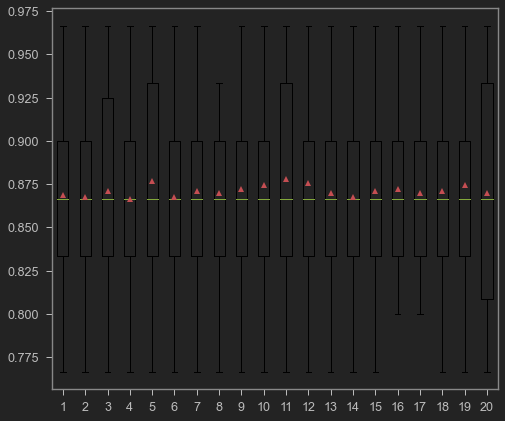

In [12]:
#lib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()


The best value is 4, with 4 iterations itself we can get the best acc